## 探索coco2017 与 coco2014的关系

In [1]:
import os 

In [2]:
val2017 = os.listdir('val2017')
train2017 = os.listdir('train2017')
test2017 = os.listdir('test2017')

In [3]:
print(len(train2017),len(val2017),len(test2017),len(train2017)+len(val2017)+len(test2017))

118287 5000 40670 163957


In [4]:
val2014 = os.listdir('val2014')
train2014 = os.listdir('train2014')
test2014 = os.listdir('test2014')

In [5]:
print(len(train2014),len(val2014),len(test2014),len(train2014)+len(val2014)+len(test2014))

82783 40504 40775 164062


In [6]:
val2017 = set(val2017)
train2017 = set(train2017)
test2017 = set(test2017)

In [7]:
val2014_ = []
for item in val2014:
    val2014_.append(item[13:])
val2014 = set(val2014_)

train2014_ = []
for item in train2014:
    train2014_.append(item[15:])
train2014 = set(train2014_)
    
test2014_ = []
for item in train2014:
    test2014_.append(item[14:])
test2014 = set(test2014_)

In [9]:
intersection = val2014 & val2017
intersection = list(intersection)
len(intersection)

5000

交集为5000的意思是val2017是val2014的子集,采集mini_coco的依据是将val2014数据集中的val2017去掉,将剩余的val2014数据集作为cocotrain_mini

## 删除多余注释与多余图片

In [9]:
import json
import re

In [10]:
ana = 'annotations/instances_val2014.json'
with open(ana) as f1:
    val2014_ana = json.load(f1)

In [11]:
ana_2017 = 'annotations/instances_val2017.json'
with open(ana_2017) as f2:
    val2017_ana = json.load(f2)

In [14]:
#记录要删除图片在val2014中的索引
index = []
for intersect in intersection:
    i = -1
    for img in val2014_ana['images']:
        i += 1
        if intersect in img['file_name']:
            index.append(i)

In [15]:
for ind in sorted(index, reverse = True):
    del val2014_ana['images'][ind]

In [62]:
#记录要删除的注释在val2014中的索引
index_ann = []
for intersect in intersection:
    i = -1
    for annotation in val2014_ana['annotations']:
        i += 1
        if str(annotation['image_id']) == intersect.split('.jpg')[0].split(re.match('0*',intersect).group())[1]:
            index_ann.append(i)

In [65]:
for ind in sorted(index_ann, reverse = True):
    del val2014_ana['annotations'][ind]

In [67]:
with open ("minicocotrain.json","w") as f4:
    json.dump(val2014_ana,f4)

In [ ]:
#删除目录下对应的图片
for item in intersection:
    if os.path.isfile('minicocotrain/COCO_val2014_' + item):
        os.remove('minicocotrain/COCO_val2014_' + item)

## coco数据分布统计

In [1]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import numpy as np

loading annotations into memory...
Done (t=6.59s)
creating index...
index created!
number of categories:  80
COCO categories: 
 ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
----------

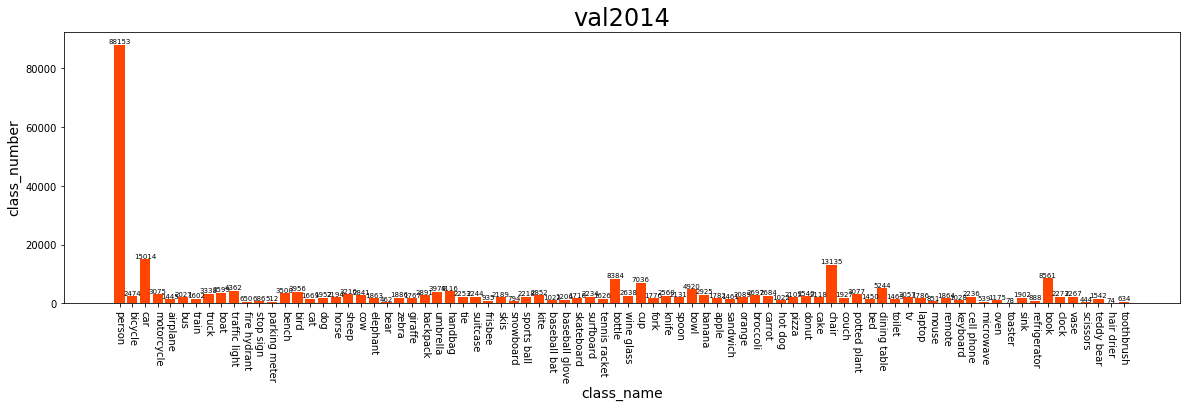

In [4]:
dataDir='./'
dataType='val2014'
#dataType='train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir, dataType)
 
# initialize COCO api for instance annotations
coco=COCO(annFile)

# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
cat_nms=[cat['name'] for cat in cats]
print('number of categories: ', len(cat_nms))
print('COCO categories: \n', cat_nms)
print('--------------------------------------------------------------')

class_img_num = []
class_ann_num = []
# 统计各类的图片数量和标注框数量
for cat_name in cat_nms:
    catId = coco.getCatIds(catNms=[cat_name])     # 1~90
    imgId = coco.getImgIds(catIds=catId)        # 图片的id  
    annId = coco.getAnnIds(catIds=catId)        # 标注框的id
    class_img_num.append(len(imgId))
    class_ann_num.append(len(annId))
    #print("{:<15} {:<6d}     {:<10d}".format(cat_name, len(imgId), len(annId)))


plt.figure(figsize=(20, 5))
x = np.arange(80)
plt.bar(cat_nms, class_ann_num, color='orangered', label='class_ann_num', align='center')

plt.title(dataType,fontsize=24)
plt.xlabel('class_name',fontsize=14)
plt.xticks(rotation=270)
plt.ylabel('class_number',fontsize=14)
for a,b in zip(cat_nms,class_ann_num):
    plt.text(a,b+0.1,'%.0f'%b,ha = 'center',va = 'bottom',fontsize=7)
plt.show()

## 根据cocomini dataset 生成对应的图片

In [2]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import numpy as np

loading annotations into memory...
Done (t=6.17s)
creating index...
index created!
number of categories:  80
COCO categories: 
 ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
----------

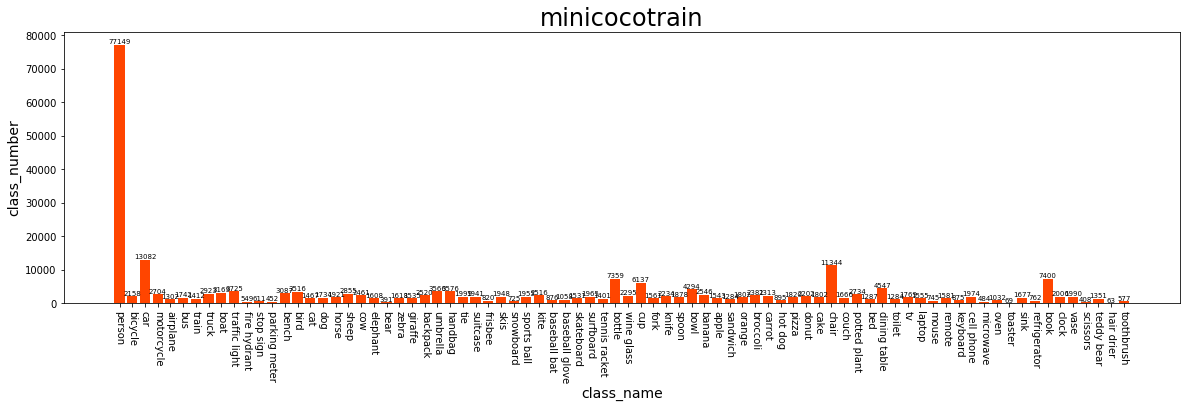

In [25]:
dataDir='./'
dataType='minicocotrain'
#dataType='train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir, dataType)
 
# initialize COCO api for instance annotations
coco=COCO(annFile)

# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
cat_nms=[cat['name'] for cat in cats]
print('number of categories: ', len(cat_nms))
print('COCO categories: \n', cat_nms)
print('--------------------------------------------------------------')

class_img_num = []
class_ann_num = []
# 统计各类的图片数量和标注框数量
for cat_name in cat_nms:
    catId = coco.getCatIds(catNms=[cat_name])     # 1~90
    imgId = coco.getImgIds(catIds=catId)        # 图片的id  
    annId = coco.getAnnIds(catIds=catId)        # 标注框的id
    class_img_num.append(len(imgId))
    class_ann_num.append(len(annId))
    #print("{:<15} {:<6d}     {:<10d}".format(cat_name, len(imgId), len(annId)))


plt.figure(figsize=(20, 5))
x = np.arange(80)
plt.bar(cat_nms, class_ann_num, color='orangered', label='class_ann_num', align='center')

plt.title(dataType,fontsize=24)
plt.xlabel('class_name',fontsize=14)
plt.xticks(rotation=270)
plt.ylabel('class_number',fontsize=14)
for a,b in zip(cat_nms,class_ann_num):
    plt.text(a,b+0.1,'%.0f'%b,ha = 'center',va = 'bottom',fontsize=7)
plt.show()